In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys
import time
from scipy import stats
from sklearn import preprocessing
import networkx as nx
import string

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nguye639/DSCI_Project/master/cleanData.csv")
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df_sub = df.loc[:,['Name'] + [f'Bill_{i}' for i in range(1, 311)]]

In [4]:
df_piv = df_sub.pivot_table( columns='Name',
                     values=[f'Bill_{i}' for i in range(1, 311)], aggfunc='first').reset_index()
df_piv.head()

Name,index,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
0,Bill_1,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
1,Bill_10,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,...,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Nay,Yea
2,Bill_100,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,...,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Nay,Yea
3,Bill_101,Yea,Yea,Nay,Yea,Yea,Nay,Yea,Yea,Yea,...,Nay,Nay,Nay,Nay,Yea,Nay,Nay,Yea,Nay,Yea
4,Bill_102,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [5]:
df_sub.head()

,Name,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Nay,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea


In [6]:
df_sub.melt(id_vars=[f'Bill_{i}' for i in range(1, 311)],
           var_name='Name')

,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,Bill_10,...,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310,Name,value
0,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,a_dutch_ruppersberger
1,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,abigail_spanberger
2,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Nay,...,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Name,adam_kinzinger
3,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,adam_schiff
4,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,adam_smith
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Yea,Yea,Nay,...,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea,Name,william_timmons
434,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Yea,Nay,Nay,...,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea,Name,young_kim
435,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea,Name,yvette_clarke
436,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Yea,Yea,Nay,...,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea,Name,yvette_herrell


In [7]:
df.head()

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea


In [8]:
df

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,william_timmons,South_Carolina,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea
434,young_kim,California,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea
435,yvette_clarke,New_York,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
436,yvette_herrell,New_Mexico,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea


In [9]:
df

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,william_timmons,South_Carolina,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea
434,young_kim,California,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea
435,yvette_clarke,New_York,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
436,yvette_herrell,New_Mexico,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea


In [10]:
df["Bill_1"].unique()

array(['Yea', 'Nay'], dtype=object)

In [11]:
le = preprocessing.LabelEncoder()


- Introduce bernoulli probability model where politicians become columns, bills become rows
- demonstrates a unique way of seeing who corresponds to which bill with their decision making

- probabilistic clusters: bernoulli mixture model, restricted boltzman machines (probabilistic neural network)



In [12]:
df.columns

Index(['Name', 'State', 'Party', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4',
       'Bill_5', 'Bill_6', 'Bill_7',
       ...
       'Bill_301', 'Bill_302', 'Bill_303', 'Bill_304', 'Bill_305', 'Bill_306',
       'Bill_307', 'Bill_308', 'Bill_309', 'Bill_310'],
      dtype='object', length=313)

In [13]:
df

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,william_timmons,South_Carolina,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea
434,young_kim,California,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea
435,yvette_clarke,New_York,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
436,yvette_herrell,New_Mexico,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Nay,Yea


Identify a new column that shows whether or not politicians are voting for or against their party.
- (-1) — voting against their party
- (1) — voting with their party
- We can take a percentage to see who voted with their party and who voted against their party


In [14]:
df.value_counts()

Name                   State       Party       Bill_1  Bill_2  Bill_3  Bill_4  Bill_5  Bill_6  Bill_7  Bill_8  Bill_9  Bill_10  Bill_11  Bill_12  Bill_13  Bill_14  Bill_15  Bill_16  Bill_17  Bill_18  Bill_19  Bill_20  Bill_21  Bill_22  Bill_23  Bill_24  Bill_25  Bill_26  Bill_27  Bill_28  Bill_29  Bill_30  Bill_31  Bill_32  Bill_33  Bill_34  Bill_35  Bill_36  Bill_37  Bill_38  Bill_39  Bill_40  Bill_41  Bill_42  Bill_43  Bill_44  Bill_45  Bill_46  Bill_47  Bill_48  Bill_49  Bill_50  Bill_51  Bill_52  Bill_53  Bill_54  Bill_55  Bill_56  Bill_57  Bill_58  Bill_59  Bill_60  Bill_61  Bill_62  Bill_63  Bill_64  Bill_65  Bill_66  Bill_67  Bill_68  Bill_69  Bill_70  Bill_71  Bill_72  Bill_73  Bill_74  Bill_75  Bill_76  Bill_77  Bill_78  Bill_79  Bill_80  Bill_81  Bill_82  Bill_83  Bill_84  Bill_85  Bill_86  Bill_87  Bill_88  Bill_89  Bill_90  Bill_91  Bill_92  Bill_93  Bill_94  Bill_95  Bill_96  Bill_97  Bill_98  Bill_99  Bill_100  Bill_101  Bill_102  Bill_103  Bill_104  Bill_105  Bill_106  B

In [15]:
#df.Group.value_counts()

In [16]:
df["Bill_309"].value_counts()

Yea    258
Nay    180
Name: Bill_309, dtype: int64

In [17]:
df.groupby("Bill_309")["Party"].value_counts()

Bill_309  Party     
Nay       Republican    180
Yea       Democrat      224
          Republican     34
Name: Party, dtype: int64

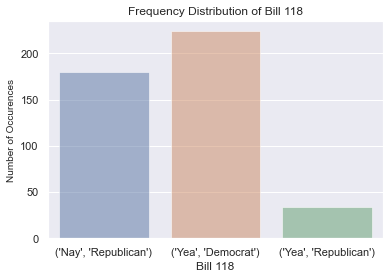

In [18]:
sample = df.groupby("Bill_309")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

# maybe we should convert what the values are so its just easier all around?

In [19]:
df["Bill_108"].value_counts()

Yea    430
Nay      8
Name: Bill_108, dtype: int64

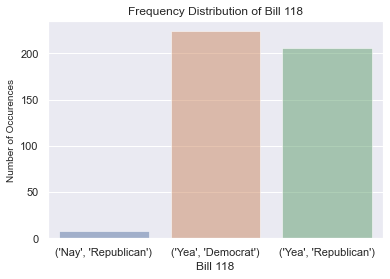

In [20]:
sample = df.groupby("Bill_108")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

In [21]:
df.groupby("Bill_180")["Party"].value_counts()

Bill_180  Party     
Nay       Republican    181
Yea       Democrat      224
          Republican     33
Name: Party, dtype: int64

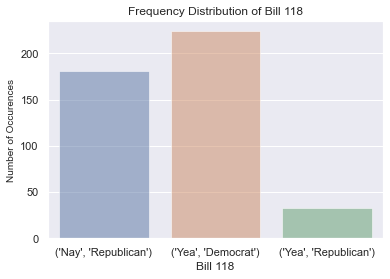

In [22]:
sample = df.groupby("Bill_180")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

In [23]:
df["Bill_118"].value_counts()

Yea    337
Nay    101
Name: Bill_118, dtype: int64

In [24]:
df.groupby("Bill_118")["Party"].value_counts()

Bill_118  Party     
Nay       Republican    101
Yea       Democrat      224
          Republican    113
Name: Party, dtype: int64

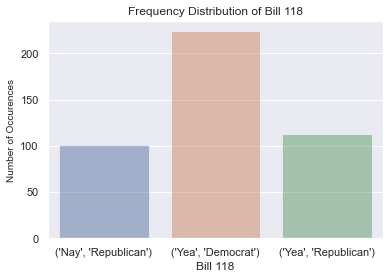

In [25]:
sample = df.groupby("Bill_118")["Party"].value_counts()
vote_count = sample
sns.set(style="darkgrid")
sns.barplot(sample.index, sample.values, alpha = 0.5)
plt.title('Frequency Distribution of Bill 118')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Bill 118', fontsize=12)
plt.show()

In [26]:
# for value in df.iloc[:, 3:]:
#     df[value].replace({"Yea":1, "Not_Voting":0, "Nay":-1}, inplace = True)

In [27]:
names = df["Name"]
party =  df["Party"]

In [28]:
repNames = names[party=="Republican"]
demNames = names[party=="Democrat"]

In [29]:
#label encoder
le = preprocessing.LabelEncoder()
le.fit(df["Bill_10"])
for i in range(1,311):
    df["Bill_"+str(i)] = le.transform(df["Bill_"+str(i)])
print(le.classes_)

['Nay' 'Yea']


In [30]:
df = df.drop(["State","Party"], axis =1)
df.head()

,Name,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
1,abigail_spanberger,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
2,adam_kinzinger,1,0,0,0,1,0,1,0,0,...,1,1,0,0,1,1,1,1,1,1
3,adam_schiff,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
4,adam_smith,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1


In [31]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1


In [32]:
df.columns = df.iloc[0]
df = df.drop("Name")
df.head()

Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_5,0,0,1,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0


In [33]:
def jac_sim(x, y):
    inter = len(list(set(x).intersection(y))) # computes their intersection
    union = (len(x) + len(y)) - inter # computes their union
    return float(inter) / union # divides intersection by the union, as per the formula

In [34]:
def jacMatrix(names, df):
    distances = []
    for i in names:
        person = df[i]
        distance = []
        for j in df.columns:
            distance.append(jac_sim(person, df[j]))
            
        distances.append(distance)
    return distances

In [35]:
dist = jacMatrix(names, df)

In [36]:
dist[3]

[0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.003236245954692557,
 0.00323624

In [37]:
def distanceMatrix(names, df):
    distances = []
    for i in names:
        person = df[i]
        distance = []
        for j in df.columns:
            distance.append(310 - (np.sum(person == df[j])))
            
        distances.append(distance)
    return distances

In [38]:
distMat = distanceMatrix(names, df)

In [39]:
distMat[2]

[186,
 177,
 0,
 192,
 191,
 41,
 195,
 191,
 189,
 193,
 183,
 190,
 48,
 198,
 187,
 187,
 190,
 69,
 29,
 100,
 77,
 184,
 193,
 179,
 187,
 185,
 32,
 189,
 186,
 20,
 181,
 30,
 48,
 42,
 198,
 193,
 57,
 54,
 61,
 186,
 39,
 186,
 191,
 44,
 37,
 188,
 64,
 41,
 38,
 34,
 43,
 193,
 192,
 188,
 37,
 183,
 191,
 190,
 34,
 58,
 58,
 189,
 62,
 45,
 40,
 63,
 27,
 42,
 179,
 192,
 33,
 189,
 41,
 182,
 189,
 179,
 96,
 31,
 177,
 44,
 183,
 41,
 40,
 39,
 64,
 33,
 182,
 181,
 203,
 180,
 66,
 34,
 27,
 191,
 35,
 46,
 192,
 39,
 36,
 185,
 41,
 187,
 22,
 40,
 34,
 189,
 52,
 45,
 185,
 183,
 26,
 184,
 189,
 48,
 185,
 184,
 190,
 187,
 41,
 188,
 53,
 189,
 33,
 31,
 190,
 186,
 185,
 193,
 189,
 52,
 49,
 39,
 33,
 192,
 192,
 46,
 179,
 185,
 190,
 182,
 36,
 179,
 188,
 46,
 187,
 20,
 183,
 33,
 185,
 192,
 38,
 31,
 193,
 32,
 34,
 34,
 55,
 184,
 187,
 53,
 35,
 194,
 190,
 50,
 185,
 188,
 39,
 67,
 38,
 38,
 192,
 191,
 181,
 36,
 177,
 190,
 201,
 42,
 189,
 38,
 41,
 1

In [40]:
df

Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_5,0,0,1,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bill_306,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,1,0,1,1,0,1
Bill_307,0,0,1,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0
Bill_308,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_309,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,1,0,1


- graphing clusters
- similarity networks
- in which issues did democrats' and republicans' votes differ most?
- principal component analysis? compute distance using Rajski's distance?